# Python ve OpenCV: Şerit Tespiti
 - https://medium.com/@sddkal/python-ve-opencv-şerit-tespiti-18bc4d4ad3b3

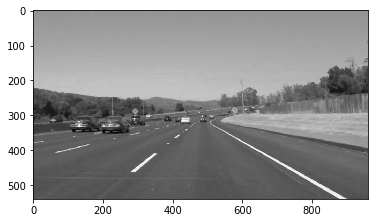

In [6]:
#İlk önce imgeyi okuyup grayscale hale getirelim:
import cv2
import numpy as np 
filename = "lane.jpg"
img = cv2.imread(filename) # dosyayi oku
from matplotlib import pyplot as plt
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale kopya
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # rgb kopya
plt.imshow(im, cmap='gray')
plt.show()

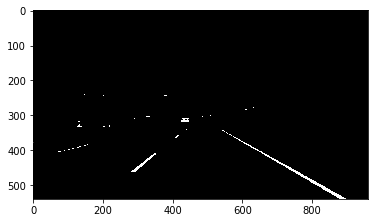

In [7]:
#Beyaz rengi ayıralım:
masked_white = cv2.inRange(im,200,255)
plt.imshow(masked_white, cmap='gray')
plt.show()

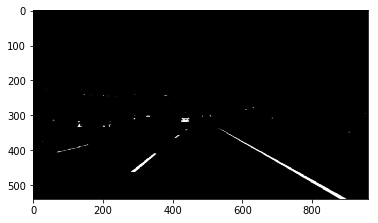

In [8]:
#Çıkan imgede kenar tespiti yapabilmek Gaussian blur kullanacağız:
# Gaussian Blur
blurred = cv2.GaussianBlur(masked_white,(5,5),0.8)
plt.imshow(blurred, cmap='gray')
plt.show()

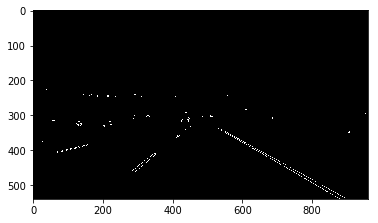

In [9]:
#Sonrasında Canny Edge Detector ile kenarları çıkaralım:
edge_image = cv2.Canny(blurred,50,150)
plt.imshow(edge_image, cmap='gray')
plt.show()

[[[150 525]
  [440 320]
  [520 330]
  [920 525]]]


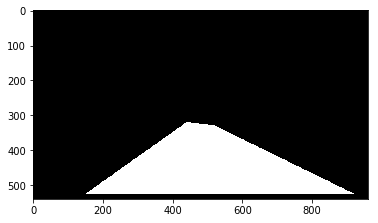

(540, 960) (540, 960)


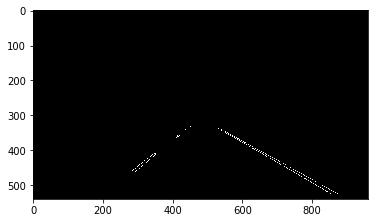

In [11]:
# ROI 
mask = np.zeros_like(edge_image)
vertices = np.array([[(150,525),(440,320),(520,330),(920,525)]],np.int32)
print (vertices)
cv2.fillPoly(mask, vertices, 255)

plt.imshow(mask, cmap='gray')
plt.show()

print (edge_image.shape, mask.shape)
masked = cv2.bitwise_and(edge_image, mask)
plt.imshow(masked, cmap='gray')
plt.show()

[[[534 337 874 525]]

 [[530 338 855 525]]

 [[281 460 451 332]]

 [[291 462 452 332]]

 [[595 371 657 406]]

 [[530 337 828 509]]

 [[281 461 416 356]]

 [[333 419 411 364]]

 [[292 462 438 340]]]


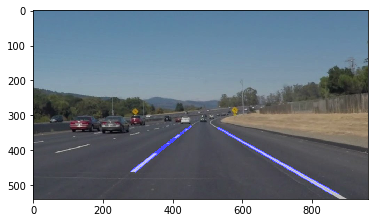

In [13]:
lines = cv2.HoughLinesP(masked,2,np.pi/180,20,np.array([]),minLineLength=50,maxLineGap=200)
zeros = np.zeros_like(img)
print (lines)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(zeros,(x1,y1),(x2,y2),(0,0,255),4)

img = cv2.addWeighted(img,0.8,zeros, 1.0,0.)
plt.imshow(img)
plt.show()

# OpenCV Python şerit takibi ve sesli uyarı
 - http://www.emreincu.com/index/makale/opencv-python-serit-takibi-ve-sesli-uyari

In [18]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths

import numpy as np
import imutils
import cv2
import sys
import os
import threading
import time

run = False

def sesCal(dosya):
	global run
	os.system('aplay '+ dosya +'.wav')
	time.sleep(3)
	run = False

camera = cv2.VideoCapture(0)

In [ ]:
while True:
	ret, image = camera.read()
	image = imutils.resize(image, width=300)

	image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

	lower = np.uint8([90, 20,   50])
	upper = np.uint8([100, 170, 200])
	yellow_mask = cv2.inRange(image, lower, upper)
	yellow = cv2.bitwise_and(image, image, mask = yellow_mask)
	yellow = cv2.cvtColor(yellow, cv2.COLOR_BGR2GRAY)

	blur = cv2.GaussianBlur(yellow,(5,5),0)

	ret,th1 = cv2.threshold(yellow,35,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
	ret1,th2 = cv2.threshold(th1,127,255,cv2.THRESH_TOZERO)
	
	_, contours, hierarchy = cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

	image = cv2.cvtColor(image, cv2.COLOR_HLS2RGB)

	if len(contours)>0:
		c = max(contours, key=cv2.contourArea)
		M = cv2.moments(c)
		area = cv2.contourArea(c)
		if area > 2000:
			cx = int(M['m10']/M['m00'])
			cy = int(M['m01']/M['m00'])
			

			cv2.line(image,(cx,0),(cx,720),(255,0,0),1)
			cv2.line(image,(0,cy),(1280,cy),(255,0,0),1)

			cv2.circle(image,(cx,cy), 3, (0,0,255), -1)
			cv2.drawContours(image, contours, -1, (0,255,0), 2)

			if cx < 100:
				print('sol')
				if not run:
					run = True
					threading.Thread(target=sesCal, args=("sol", )).start()

			elif cx > 200:
				print('sag')
				if not run:
					run = True
					threading.Thread(target=sesCal, args=("sag", )).start()
			else:
				print('duz git')

	
	cv2.imshow("input", image)
	key = cv2.waitKey(10)
	if key == 27:
		break
	
cv2.destroyAllWindows()
cv2.VideoCapture(0).release()

